Importing libraries...
✓ Libraries imported
Using device: cpu

Loading data...
✓ Train: 11  |  Val: 2  |  Test: 3
Columns available: ['mfcc_0_mean', 'mfcc_0_std', 'mfcc_0_min', 'mfcc_0_max', 'mfcc_1_mean', 'mfcc_1_std', 'mfcc_1_min', 'mfcc_1_max', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_2_min', 'mfcc_2_max', 'mfcc_3_mean', 'mfcc_3_std', 'mfcc_3_min', 'mfcc_3_max', 'mfcc_4_mean', 'mfcc_4_std', 'mfcc_4_min', 'mfcc_4_max', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_5_min', 'mfcc_5_max', 'mfcc_6_mean', 'mfcc_6_std', 'mfcc_6_min', 'mfcc_6_max', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_7_min', 'mfcc_7_max', 'mfcc_8_mean', 'mfcc_8_std', 'mfcc_8_min', 'mfcc_8_max', 'mfcc_9_mean', 'mfcc_9_std', 'mfcc_9_min', 'mfcc_9_max', 'mfcc_10_mean', 'mfcc_10_std', 'mfcc_10_min', 'mfcc_10_max', 'mfcc_11_mean', 'mfcc_11_std', 'mfcc_11_min', 'mfcc_11_max', 'mfcc_12_mean', 'mfcc_12_std', 'mfcc_12_min', 'mfcc_12_max', 'pitch_mean', 'pitch_std', 'pitch_min', 'pitch_max', 'pitch_range', 'energy_mean', 'energy_std', 'energy_min', 'e

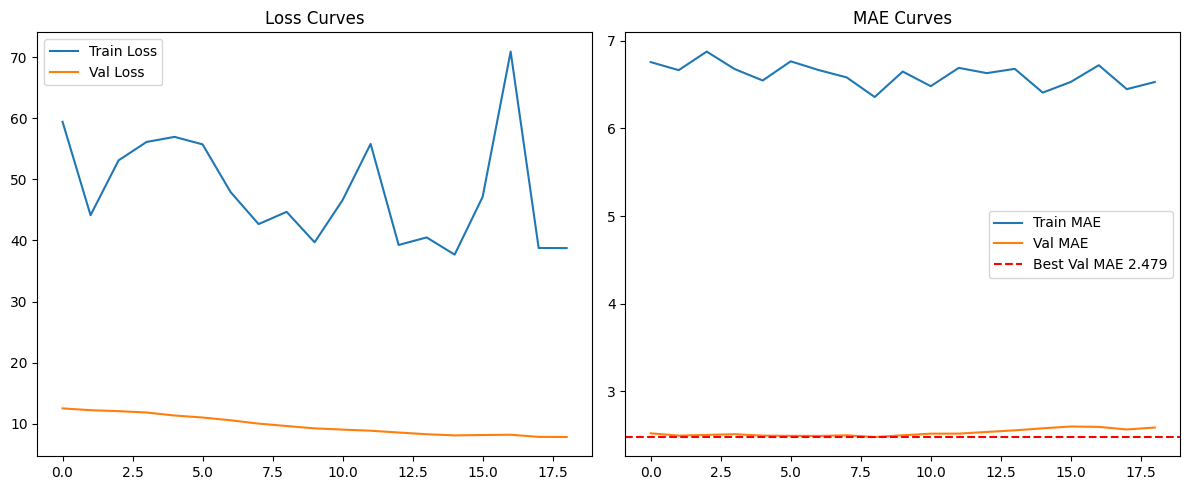


FINAL EVALUATION
Validation → MAE: 2.479, RMSE: 3.107, R²: -0.545
Test       → MAE: 9.368, RMSE: 11.918, R²: -1.536
✓ Metrics saved → C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\results\metrics\text_bert_results.csv
✓ Predictions saved → C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\results\metrics\text_bert_test_predictions.csv


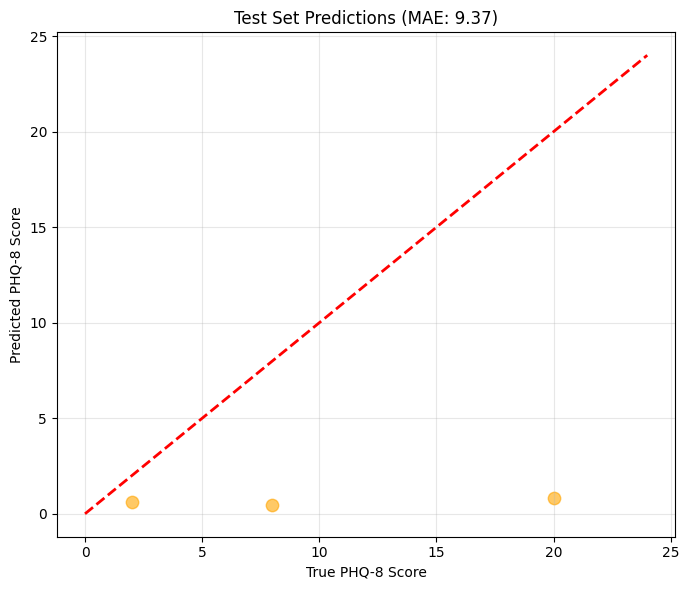


✅ TEXT-ONLY BASELINE COMPLETE
Best Validation MAE: 2.4789
Test MAE: 9.3684
Model saved at: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\models\saved_models\text_bert_best.pth
Results saved to: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\results\metrics\text_bert_results.csv


In [2]:
"""
NOTEBOOK 7: Text-Only (Dense/BERT Placeholder) Baseline Model

SAVE AS: notebooks/modeling/02_text_bert_baseline.ipynb

WHAT THIS DOES:
- Builds regression model using ONLY text (or numerical placeholder) features
- Trains to predict PHQ-8 score
- Evaluates on validation and test sets
- Saves model, metrics, and visualizations

TIME: ~15–30 minutes
"""

# =========================================================
# CELL 1: Imports and Setup
# =========================================================
print("Importing libraries...")

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported")

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# =========================================================
# CELL 2: Load Data
# =========================================================
print("\nLoading data...")

BASE_DIR = Path(r"C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project")
PROCESSED_DIR = BASE_DIR / "data" / "processed"
MODELS_DIR = BASE_DIR / "models" / "saved_models"
RESULTS_DIR = BASE_DIR / "results"

MODELS_DIR.mkdir(parents=True, exist_ok=True)
(RESULTS_DIR / "figures").mkdir(parents=True, exist_ok=True)
(RESULTS_DIR / "metrics").mkdir(parents=True, exist_ok=True)

train_df = pd.read_csv(PROCESSED_DIR / "train_data.csv")
val_df = pd.read_csv(PROCESSED_DIR / "val_data.csv")
test_df = pd.read_csv(PROCESSED_DIR / "test_data.csv")

print(f"✓ Train: {len(train_df)}  |  Val: {len(val_df)}  |  Test: {len(test_df)}")
print("Columns available:", list(train_df.columns))

# =========================================================
# CELL 3: Feature Extraction
# =========================================================
print("\nExtracting usable text (or numerical) features...")

# Exclude target and identifiers
exclude_cols = ['PHQ8_Score', 'severity_class', 'session_id']
feature_cols = [col for col in train_df.columns if col not in exclude_cols]

print(f"✓ Using {len(feature_cols)} features")

# Prepare features and labels
X_train = train_df[feature_cols].values
y_train = train_df['PHQ8_Score'].values

X_val = val_df[feature_cols].values
y_val = val_df['PHQ8_Score'].values

X_test = test_df[feature_cols].values
y_test = test_df['PHQ8_Score'].values

print(f"Shapes → X_train: {X_train.shape}, y_train: {y_train.shape}")

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("✓ Features normalized")

# =========================================================
# CELL 4: Dataset & DataLoader
# =========================================================
class DepressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(DepressionDataset(X_train, y_train), batch_size=8, shuffle=True)
val_loader = DataLoader(DepressionDataset(X_val, y_val), batch_size=8, shuffle=False)
test_loader = DataLoader(DepressionDataset(X_test, y_test), batch_size=8, shuffle=False)

print("✓ DataLoaders ready")

# =========================================================
# CELL 5: Define Model
# =========================================================
class TextRegressor(nn.Module):
    """Simple dense regressor — placeholder for text/BERT features"""
    def __init__(self, input_size, hidden_sizes=[256, 128, 64], dropout=0.3):
        super(TextRegressor, self).__init__()
        layers = []
        prev = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, 1))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x).squeeze()

input_size = X_train.shape[1]
model = TextRegressor(input_size=input_size).to(device)

print("✓ Model created")
print(model)
print(f"Total params: {sum(p.numel() for p in model.parameters()):,}")

# =========================================================
# CELL 6: Training Setup
# =========================================================
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
print("✓ Training setup complete")

# =========================================================
# CELL 7: Training & Evaluation Functions
# =========================================================
def train_epoch(model, loader):
    model.train()
    total_loss, preds, trues = 0, [], []
    for Xb, yb in loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        preds.extend(out.detach().cpu().numpy())
        trues.extend(yb.cpu().numpy())
    return total_loss / len(loader), mean_absolute_error(trues, preds)

def evaluate(model, loader):
    model.eval()
    total_loss, preds, trues = 0, [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model(Xb)
            loss = criterion(out, yb)
            total_loss += loss.item()
            preds.extend(out.cpu().numpy())
            trues.extend(yb.cpu().numpy())
    avg_loss = total_loss / len(loader)
    mae = mean_absolute_error(trues, preds)
    rmse = np.sqrt(mean_squared_error(trues, preds))
    r2 = r2_score(trues, preds)
    return avg_loss, mae, rmse, r2, preds, trues

print("✓ Functions ready")

# =========================================================
# CELL 8: Training Loop
# =========================================================
print("\n" + "="*50)
print("TRAINING TEXT-ONLY BASELINE")
print("="*50)

best_val_mae = float('inf')
patience, patience_count = 10, 0
num_epochs = 50

train_losses, val_losses, train_maes, val_maes = [], [], [], []

for epoch in range(num_epochs):
    tr_loss, tr_mae = train_epoch(model, train_loader)
    val_loss, val_mae, val_rmse, val_r2, _, _ = evaluate(model, val_loader)
    
    train_losses.append(tr_loss)
    val_losses.append(val_loss)
    train_maes.append(tr_mae)
    val_maes.append(val_mae)
    scheduler.step(val_loss)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1:02d} | Train MAE: {tr_mae:.3f} | Val MAE: {val_mae:.3f} | R²: {val_r2:.3f}")
    
    if val_mae < best_val_mae:
        best_val_mae = val_mae
        torch.save(model.state_dict(), MODELS_DIR / "text_bert_best.pth")
        patience_count = 0
    else:
        patience_count += 1
    
    if patience_count >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

print(f"✓ Training complete — Best Val MAE: {best_val_mae:.4f}")

# =========================================================
# CELL 9: Training Plots
# =========================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(train_losses, label='Train Loss')
axes[0].plot(val_losses, label='Val Loss')
axes[0].set_title('Loss Curves'); axes[0].legend()
axes[1].plot(train_maes, label='Train MAE')
axes[1].plot(val_maes, label='Val MAE')
axes[1].axhline(best_val_mae, color='r', linestyle='--', label=f'Best Val MAE {best_val_mae:.3f}')
axes[1].set_title('MAE Curves'); axes[1].legend()
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'text_bert_training.png', dpi=300)
plt.show()

# =========================================================
# CELL 10: Final Evaluation
# =========================================================
print("\n" + "="*50)
print("FINAL EVALUATION")
print("="*50)

model.load_state_dict(torch.load(MODELS_DIR / "text_bert_best.pth"))

val_loss, val_mae, val_rmse, val_r2, _, _ = evaluate(model, val_loader)
test_loss, test_mae, test_rmse, test_r2, preds, trues = evaluate(model, test_loader)

print(f"Validation → MAE: {val_mae:.3f}, RMSE: {val_rmse:.3f}, R²: {val_r2:.3f}")
print(f"Test       → MAE: {test_mae:.3f}, RMSE: {test_rmse:.3f}, R²: {test_r2:.3f}")

# =========================================================
# CELL 11: Save Metrics and Predictions
# =========================================================
metrics = pd.DataFrame({
    'Split': ['Validation', 'Test'],
    'MAE': [val_mae, test_mae],
    'RMSE': [val_rmse, test_rmse],
    'R2': [val_r2, test_r2]
})
metrics.to_csv(RESULTS_DIR / 'metrics' / 'text_bert_results.csv', index=False)
print("✓ Metrics saved →", RESULTS_DIR / 'metrics' / 'text_bert_results.csv')

pred_df = pd.DataFrame({'True': trues, 'Predicted': preds})
pred_df.to_csv(RESULTS_DIR / 'metrics' / 'text_bert_test_predictions.csv', index=False)
print("✓ Predictions saved →", RESULTS_DIR / 'metrics' / 'text_bert_test_predictions.csv')

# =========================================================
# CELL 12: Prediction Scatterplot
# =========================================================
plt.figure(figsize=(7,6))
plt.scatter(trues, preds, alpha=0.6, color='orange', s=80)
plt.plot([0,24], [0,24], 'r--', linewidth=2)
plt.xlabel('True PHQ-8 Score')
plt.ylabel('Predicted PHQ-8 Score')
plt.title(f'Test Set Predictions (MAE: {test_mae:.2f})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'text_bert_predictions.png', dpi=300)
plt.show()

# =========================================================
# CELL 13: Summary
# =========================================================
print("\n" + "="*50)
print("✅ TEXT-ONLY BASELINE COMPLETE")
print("="*50)
print(f"Best Validation MAE: {best_val_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print("Model saved at:", MODELS_DIR / "text_bert_best.pth")
print("Results saved to:", RESULTS_DIR / "metrics" / "text_bert_results.csv")
print("="*50)


In [10]:
import os

# Look for any CSV file that may contain audio LSTM metrics
for root, _, files in os.walk("results"):
    for f in files:
        if "audio" in f.lower() and f.endswith(".csv"):
            print(os.path.join(root, f))


In [11]:
import os

# Search entire project for any CSV that might contain LSTM metrics
for root, _, files in os.walk("."):
    for f in files:
        if f.endswith(".csv") and any(x in f.lower() for x in ["audio", "lstm", "baseline"]):
            print(os.path.join(root, f))
